# A Mathematical Approach for Identifying Best Line

In the previous sub-section we intuitively identified what a better line is. Now we will mathematically derive the characters of the best line; that is the coefficients of the best fit.

The coefficients of the best fit is often called _OLS estimators_ (and the OLS estimators that satisfy some assumptions are called Best Linear Unbiased Estimators or _BLUE_ which we will return later). We start by developing a method to estimate OLS.

We begin by generating the same sample data in the previous example:

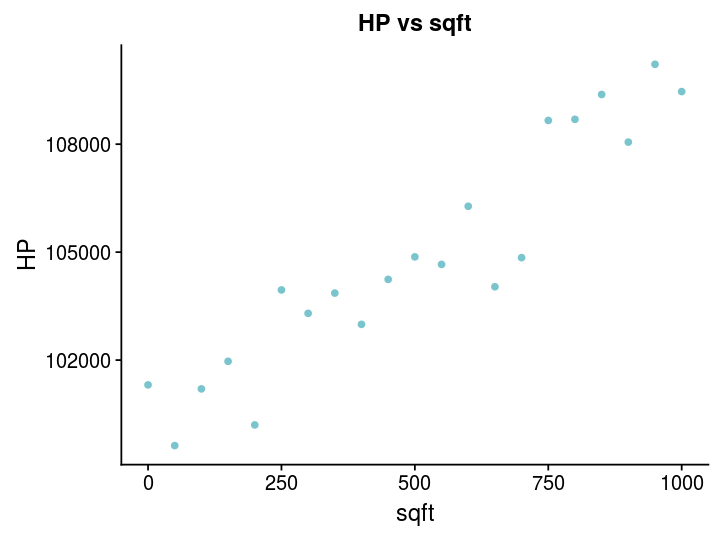

In [66]:
library("ggplot2")
options(repr.plot.width=6, repr.plot.height=4.5)
set.seed(122)
sqft <- seq(0,1000,50)
HP   <- 100000 + 10*sqft + 1000*rnorm(length(sqft))
HPdat <- data.frame(HP,sqft)


p1 <- ggplot(HPdat, aes(x = sqft, y = HP))
p1 <- p1 + geom_point(color = "cadetblue3") + ggtitle(paste0("HP vs sqft"))
# p1 <- p1 + geom_line(aes(y = fitline)) + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=fitline)
plot(p1)


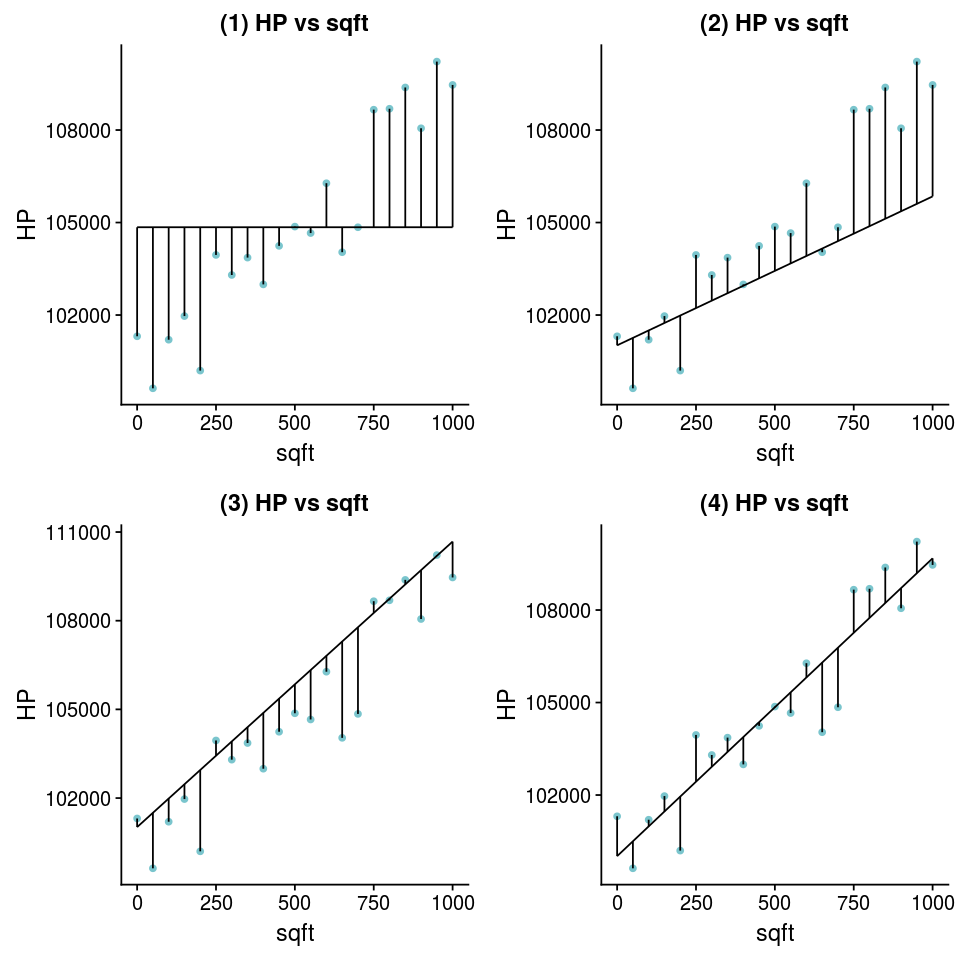

In [65]:
fit  <- lm(HP ~ sqft)
options(repr.plot.width=8, repr.plot.height=8)

pred1 <- rep(mean(HPdat$HP),nrow(HPdat))
p  <- ggplot(HPdat, aes(x = sqft, y = HP))
p  <- p + geom_point(color = "cadetblue3") + ggtitle(paste0("(1) HP vs sqft"))
p1 <- p + geom_line(aes(y = pred1)) + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=pred1)

temp  <- lm(HP~sqft,HPdat)
pred2 <- HPdat$sqft*coef(temp)[2] * .5 + coef(temp)[1] + 1000
p  <- ggplot(HPdat, aes(x = sqft, y = HP))
p  <- p + geom_point(color = "cadetblue3") + ggtitle(paste0("(2) HP vs sqft"))
p2 <- p + geom_line(aes(y = pred2)) + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=pred2)

pred3 <- predict(lm(HP~sqft,HPdat)) + 1000

p  <- ggplot(HPdat, aes(x = sqft, y = HP))
p  <- p + geom_point(color = "cadetblue3") + ggtitle(paste0("(3) HP vs sqft"))
p3 <- p + geom_line(aes(y = pred3)) + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=pred3)


pred <- predict(fit)

p  <- ggplot(HPdat, aes(x = sqft, y = HP))
p  <- p + geom_point(color = "cadetblue3") + ggtitle(paste0("(4) HP vs sqft"))
p4 <- p + geom_line(aes(y = pred)) + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=pred)




library("gridExtra")
g <- arrangeGrob(p1,p2,p3,p4,ncol=2,nrow=2)
grid.arrange(g)

In [ ]:

fit     <- lm(HP ~ sqft)
fitline <- predict(fit)
fitline <- fitline
# Grafik
p1 <- ggplot(HPdat, aes(x = sqft, y = HP))
p1 <- p1 + geom_point(aes(color = HP)) +  ggtitle(paste0("Ev fiyati ve m2"))
p1_noline <- p1
plot(p1_noline)

fit     <- lm(HP ~ sqft)
fitline <- mean(HP)
# Grafik
p1 <- ggplot(HPdat, aes(x = sqft, y = HP))
p1 <- p1 + geom_point(aes(color = HP)) + geom_line(aes(y = fitline)) +  ggtitle(paste0("Ev fiyati ve m2"))
p1 <- p1 + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=fitline)
p1_biased <- p1
plot(p1_biased)


fit     <- lm(HP ~ sqft)
fitline <- predict(fit)
fitline <- fitline + 1200  - 7 * sqft 
# Grafik
p1 <- ggplot(HPdat, aes(x = sqft, y = HP))
p1 <- p1 + geom_point(aes(color = HP)) + geom_line(aes(y = fitline)) +  ggtitle(paste0("Ev fiyati ve m2"))
p1 <- p1 + geom_segment(data=data.frame(sqft,HP),xend=sqft,yend=fitline)
p1_driftbiased <- p1
plot(p1)


X <- seq(1,20,1)
Y <- 5 + 10*X + 5*rep(c(0,0),10)

fit     <- lm(Y ~ X)
fitline <- predict(fit)
# fitline <- mean(Y)
# Grafik
p1 <- ggplot(data.frame(X,Y), aes(x = X, y = Y))
p1 <- p1 + geom_point(aes(color = Y)) + geom_line(aes(y = fitline)) +  ggtitle(paste0("R^2 = 1"))
# p1_driftbiased <- p1
plot(p1)

library(ggplot2)
house_data <- read.csv(unzip("E:/ML/data/housesalesprediction.zip"))
zcodes <- house_data$zipcode[!duplicated(house_data$zipcode)]
zcodes <- sort(zcodes)
house_data <- subset(house_data, zipcode %in% zcodes[c(26,53,69)])
house_data$zipcode[house_data$zipcode == 98040] <- "Mercer Island"
house_data$zipcode[house_data$zipcode == 98118] <- "Seattle"
house_data$zipcode[house_data$zipcode == 98198] <- "Des Moines"
# house_data <- house_data[sample(1:nrow(house_data),1000),]
# house_data$zipcode <- as.factor(house_data$zipcode)
head(house_data)
names(house_data)[17] <- "region"
# zcodes <- house_data$region[!duplicated(house_data$region)]
# zcodes <- sort(zcodes)
save(house_data, file="E:/ML/data/housesalessubset.rda")

ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=region)) + geom_point() + ggtitle("log(hp) vs log(sqft), Washington")


ggplot(house_data,
       aes(x=sqft_living, y=price,
           color=sqft_living)) + geom_point() + ggtitle("hp vs sqft, Washington")

ggplot(house_data,
       aes(x=sqft_living, y=log(price),
           color=sqft_living)) + geom_point() + ggtitle("log(hp) vs sqft, Washington")

ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=sqft_living)) + geom_point() + ggtitle("log(hp) vs log(sqft), Washington")


fit     <- lm(log(price) ~ log(sqft_living), house_data)
fitline <- predict(fit)
ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=sqft_living)) + geom_point() + geom_line(aes(y = fitline),color="black") + ggtitle("log(hp) vs log(sqft), Washington")


fit     <- lm(log(price) ~  poly(log(sqft_living),2), house_data)
fitline <- predict(fit)
ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=sqft_living)) + geom_point() + geom_line(aes(y = fitline),color="black") + ggtitle("log(hp) vs log(sqft), degree=2, Washington")


fit     <- lm(log(price) ~  poly(log(sqft_living),3), house_data)
fitline <- predict(fit)
ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=sqft_living)) + geom_point() + geom_line(aes(y = fitline),color="black") + ggtitle("log(hp) vs log(sqft), degree=3, Washington")



fit     <- lm(log(price) ~  poly(log(sqft_living),10), house_data)
fitline <- predict(fit)
ggplot(house_data,
       aes(x=log(sqft_living), y=log(price),
           color=sqft_living)) + geom_point() + geom_line(aes(y = fitline),color="black") + ggtitle("log(hp) vs log(sqft), degree=10, Washington")

# 98040: Mercer Island
# 98118: Seattle
# 98198: Des Moines
zipcodes <- house_data$zipcode
zipcodes <- zipcodes[!duplicated(zipcodes)]


logit_data <- data.frame(X=seq(-10,10,.1))
logit_data$Y <- 1/(1+(exp(-logit_data$X)))

p <- ggplot(logit_data,
       aes(x=X, y=Y
           )) + geom_point() + ggtitle("Logit Function")

p <- p + geom_vline(xintercept=0) + geom_hline(yintercept=0)
p


s1 <- data.frame(cbind(7+rnorm(20),3+rnorm(20)),'-')
s2 <- data.frame(cbind(3+rnorm(20),7+rnorm(20)),'+')

ss <- rbind(s1,s2)
colnames(ss) <- c("Demode","Orjinal","Sent")
p <- ggplot(ss,aes(x=Demode, y=Orjinal, color=Sent)) + 
            geom_point(size=7,aes(shape=Sent, color=Sent)) +
            scale_shape_manual(values=c(45, 43))+ ggtitle("Sentiment")

p <- p + geom_abline(intercept = 2.5,slope=.50)
p

sent_data <- ss

sent_data$Sent <- as.character(sent_data$Sent)
sent_data$Sent <- with(sent_data, replace(Sent,Sent=='+',1))
sent_data$Sent <- with(sent_data, replace(Sent,Sent=='-',0))
sent_data$Sent <- as.numeric(sent_data$Sent)

sent_data$Sent[sent_data$Sent == '+'] <- rep(1,sum(sent_data$Sent=='+'))
sent_data$Sent[sent_data$Sent == '-'] <- rep(0,sum(sent_data$Sent=='-'))

fit <- glm(Sent~.,binomial(link='logit'),sent_data)
summary(fit)
fit <- glm(Sent~.,'binomial',sent_data)
summary(fit)
